In [1]:
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
from obspy import read, read_inventory
import obspy
from obspy import signal
import matplotlib.pyplot as plt

## Overview
This is a jupyter notebook. It's a python enviornment that we can use to demonstrate how to use the python package `obspy` to visualize and sonify seismic data from Thwaites Glacier. Scientists regularly use notebooks as teaching tools to demonstrate workflows and organize computations and methodlogiese. Much of the code that we've included could also be run in scripts from the commandline. In addition to anything you learn from this tutorial, it is also meant to reveal how scientists organize thier work. 

## Goals

There are three main goals we hope to cover here.

1) Demonstrate how to download seismic data from the iris database (for more information about iris, see http://ds.iris.edu/ds/nodes/dmc/data/).
2) Filter these data using the response of the intsrument and a taper filter.
3) Save the data in a file format that can be easily read and interpreted in audio editing software.

## Background
We are going to focus on a signal that is associated with a claving event on Thwaites Glaicer. Thwaites Glacier is located in the Amundsen Sea Embayment wheree grounded ice has monotonically thinned and accelerated over the last three decades. The calving event in question took place in November 2018.

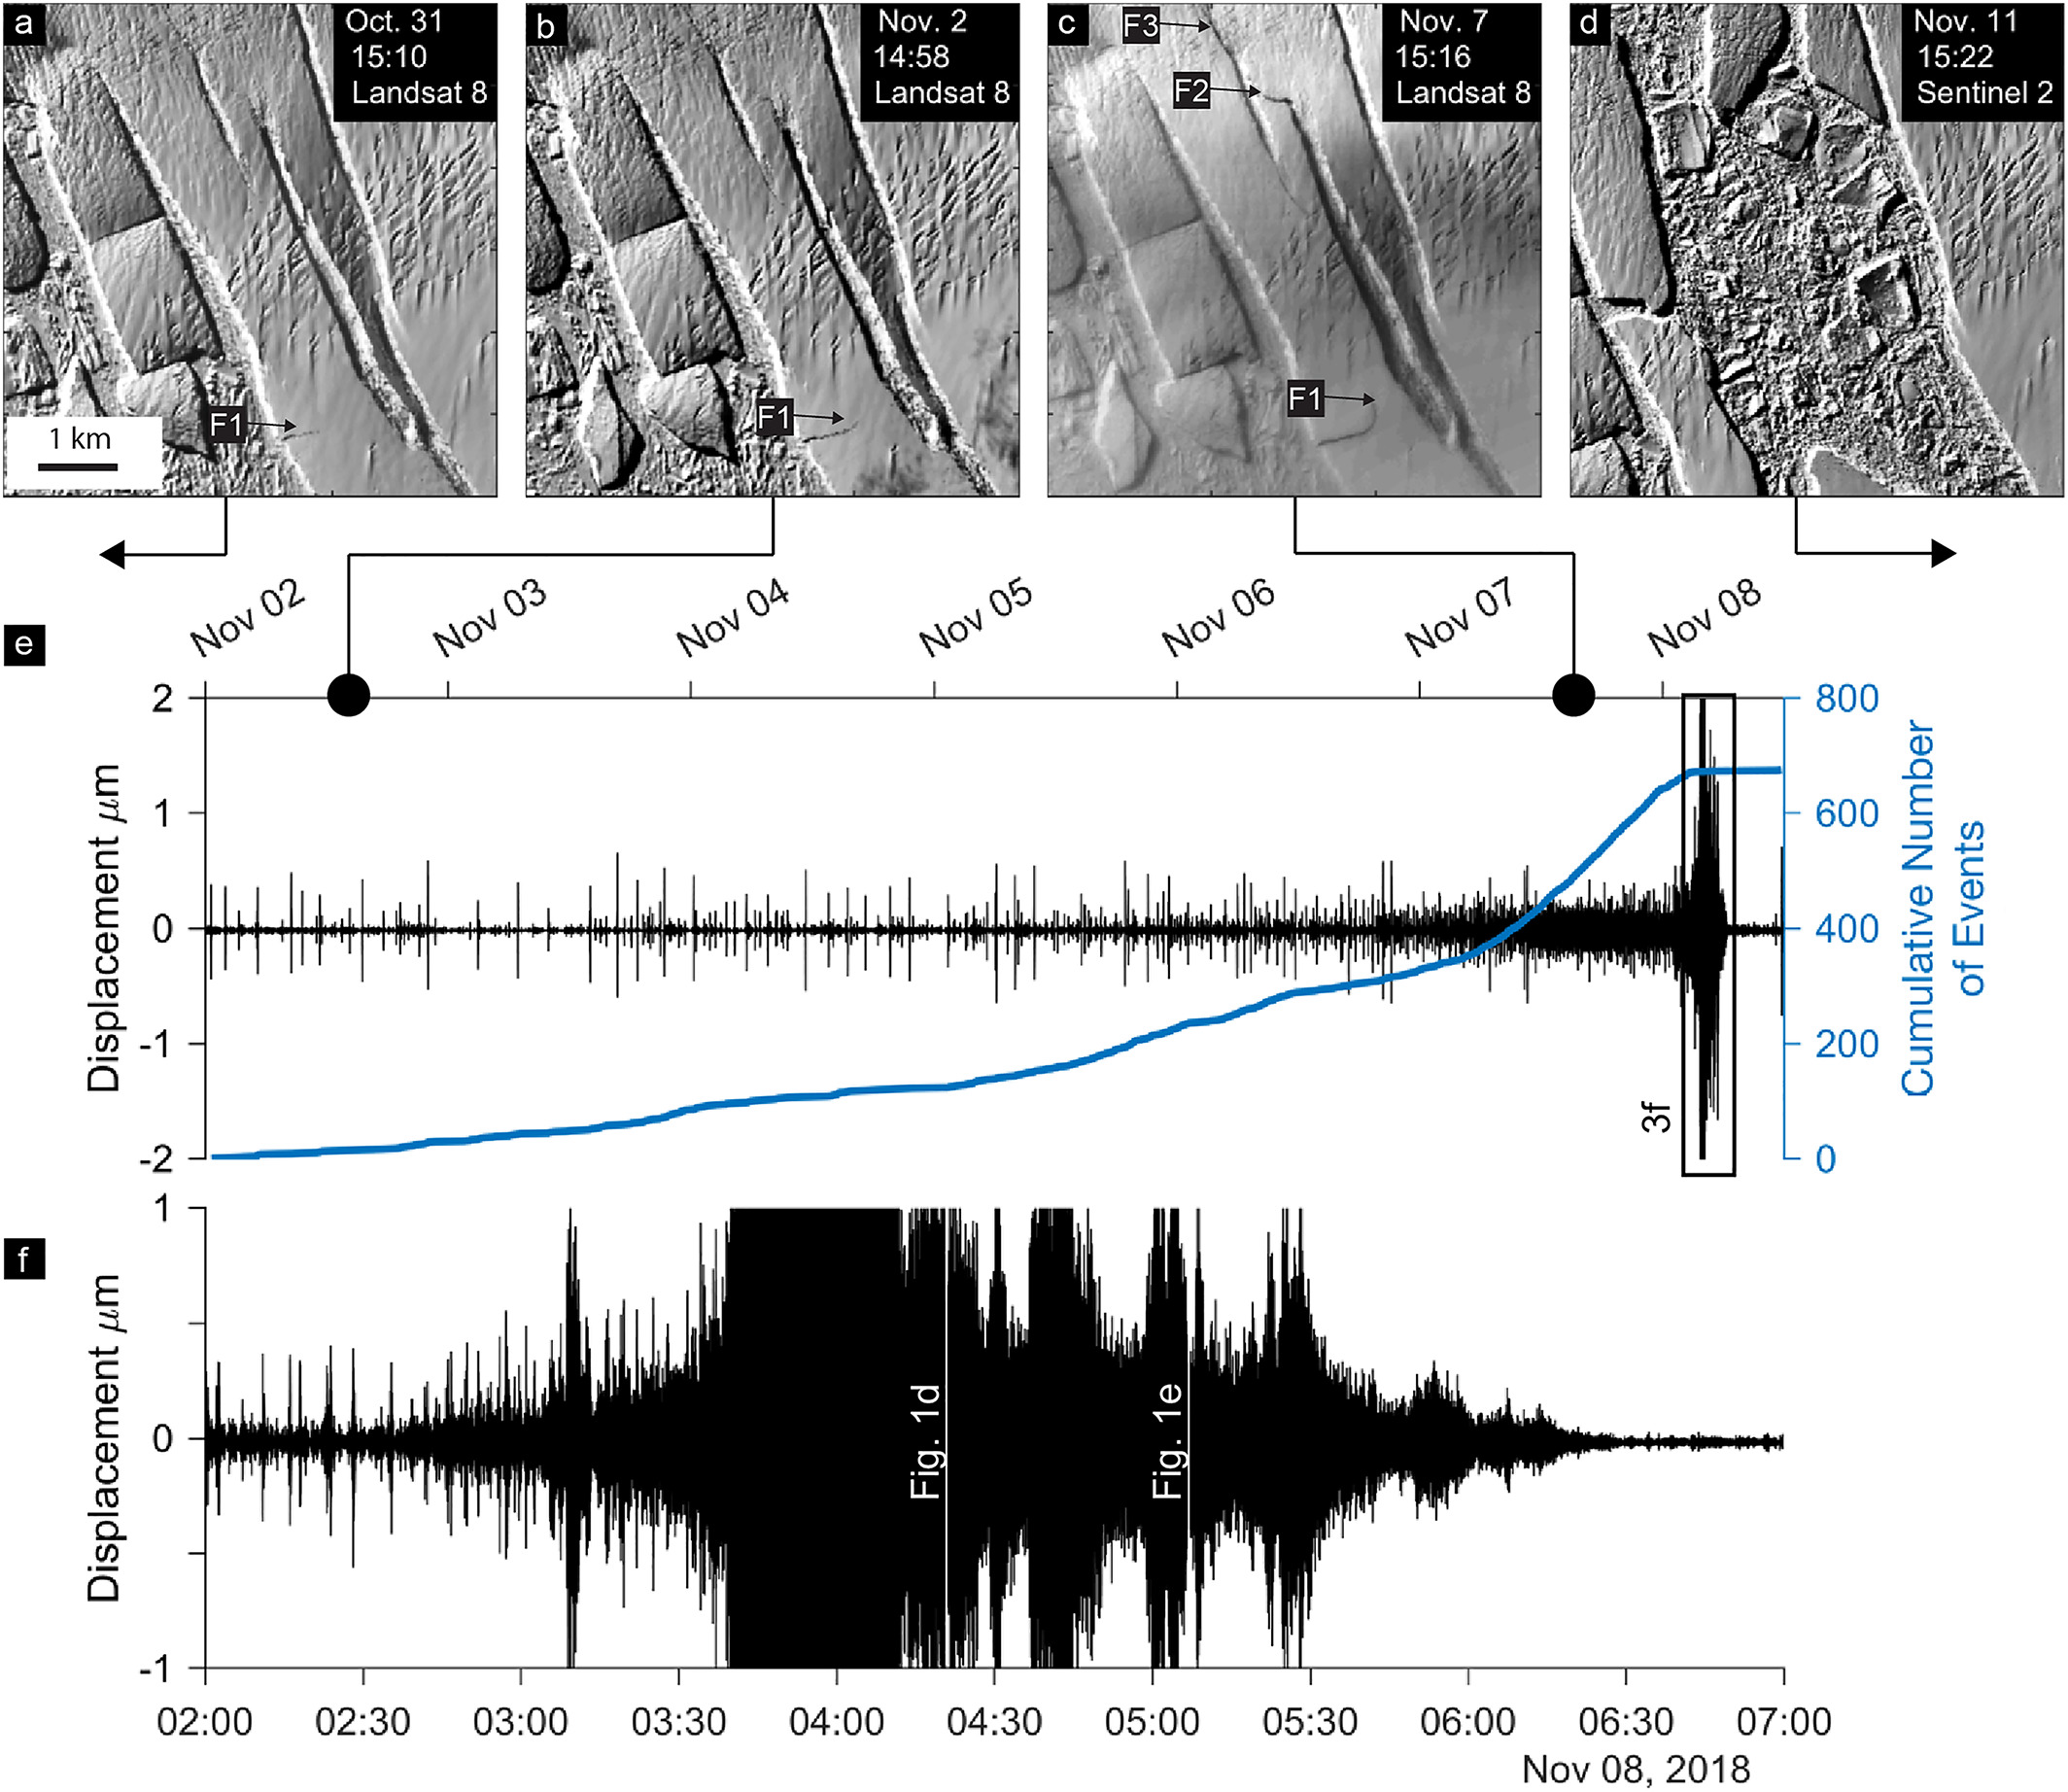

In [2]:
# Create a data service from 'IRIS' data center.
client = Client('IRIS')

# Setting the start time of waveforms.
t1 = UTCDateTime('2018-11-8T02:00:00')

# End time of waveforms: 3600 seconds shift relative to t1.
t2 = t1 + 4*3600

# Get waveforms. 
st = client.get_waveforms(network='YT', station='DNTW',
						  location='*', channel='HHZ',
						  starttime=t1, endtime=t2,
                          attach_response=True)
inv = client.get_stations(
    network='YT', station='DNTW', location='*', channel='HHZ',
    starttime=t1, endtime=t2, level='response')


1 Trace(s) in Stream:
YT.DNTW..HHZ | 2018-11-08T02:00:00.009998Z - 2018-11-08T05:59:59.999998Z | 100.0 Hz, 1440000 samples

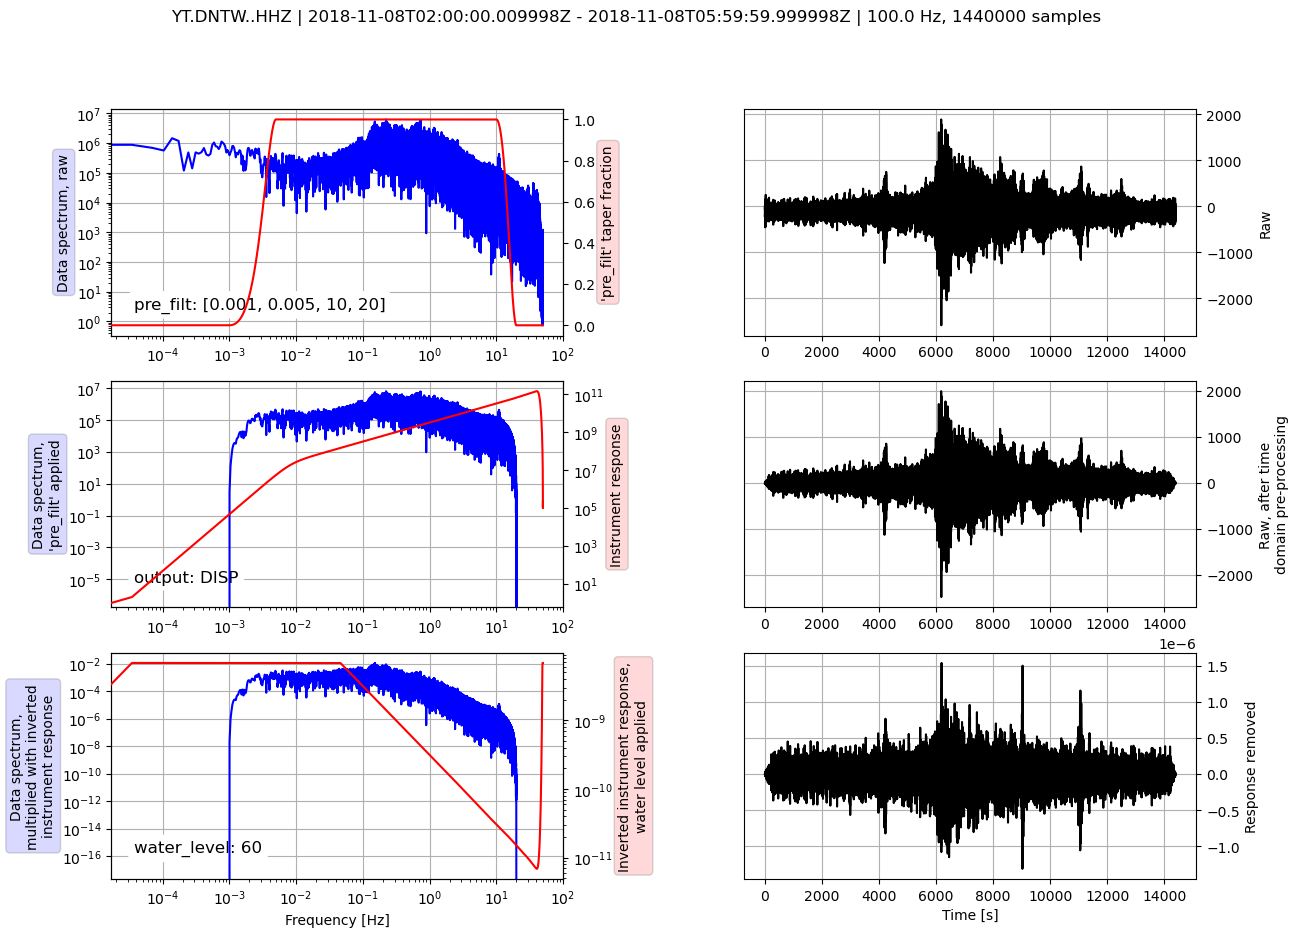

In [3]:
pre_filt = [0.001, 0.005, 10, 20]
st.remove_response(inventory=inv, output='DISP', pre_filt=pre_filt,plot=True)

In [83]:
st[0].write('../data/test.wave', format='WAV',rescale=True, framerate=10000) 

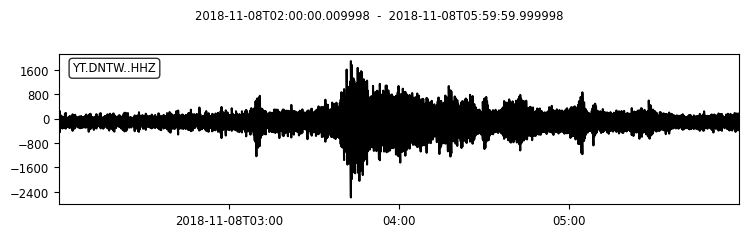

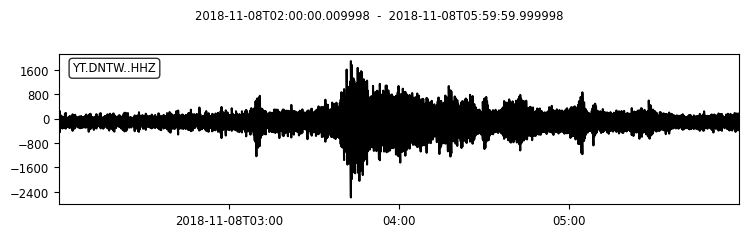

In [79]:
st[0].plot()